# Data cleaning

I will use the csv files created with the `NBA_web_scraping` notebook and prepare them for the actual machine learning 

## MVP

The `mvp.csv` file has all the names of players that have ever been voted for mvp from 1991 to 2021.

Stats are averaged across seasons during one specific year.

The `team.csv` file has teams stats, since they are also important to decide whether a player can be elected mvp or not.

I will clean and put together the `mvp.csv`, `team.csv` and `players.csv` tables to be ready and give it to the machine learning algorithm to be predict the next mvp

In [2]:
import pandas as pd

In [3]:
mvps = pd.read_csv("mvps.csv")

In [4]:
mvps

,Unnamed: 0,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,0,1,Michael Jordan,27,CHI,77.0,891.0,960,0.928,82,...,6.0,5.5,2.7,1.0,0.539,0.312,0.851,20.3,0.321,1991
1,1,2,Magic Johnson,31,LAL,10.0,497.0,960,0.518,79,...,7.0,12.5,1.3,0.2,0.477,0.320,0.906,15.4,0.251,1991
2,2,3,David Robinson,25,SAS,6.0,476.0,960,0.496,82,...,13.0,2.5,1.5,3.9,0.552,0.143,0.762,17.0,0.264,1991
3,3,4,Charles Barkley,27,PHI,2.0,222.0,960,0.231,67,...,10.1,4.2,1.6,0.5,0.570,0.284,0.722,13.4,0.258,1991
4,4,5,Karl Malone,27,UTA,0.0,142.0,960,0.148,82,...,11.8,3.3,1.1,1.0,0.527,0.286,0.770,15.5,0.225,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,10,11,Russell Westbrook,32,WAS,0.0,5.0,1010,0.005,65,...,11.5,11.7,1.4,0.4,0.439,0.315,0.656,3.7,0.075,2021
470,11,12,Ben Simmons,24,PHI,0.0,3.0,1010,0.003,58,...,7.2,6.9,1.6,0.6,0.557,0.300,0.613,6.0,0.153,2021
471,12,13T,James Harden,31,TOT,0.0,1.0,1010,0.001,44,...,7.9,10.8,1.2,0.8,0.466,0.362,0.861,7.0,0.208,2021
472,13,13T,LeBron James,36,LAL,0.0,1.0,1010,0.001,45,...,7.7,7.8,1.1,0.6,0.513,0.365,0.698,5.6,0.179,2021


I will get rid of some columns from the `mvp` table

In [5]:
mvps = mvps[["Player", "Year", "Pts Won", "Pts Max", "Share"]]

In [6]:
mvps

,Player,Year,Pts Won,Pts Max,Share
0,Michael Jordan,1991,891.0,960,0.928
1,Magic Johnson,1991,497.0,960,0.518
2,David Robinson,1991,476.0,960,0.496
3,Charles Barkley,1991,222.0,960,0.231
4,Karl Malone,1991,142.0,960,0.148
...,...,...,...,...,...
469,Russell Westbrook,2021,5.0,1010,0.005
470,Ben Simmons,2021,3.0,1010,0.003
471,James Harden,2021,1.0,1010,0.001
472,LeBron James,2021,1.0,1010,0.001


In [7]:
players = pd.read_csv("players.csv")

In [8]:
players

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,0,1,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,1,2,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,2,3,Mark Acres,C,28,ORL,68,0,19.3,1.6,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,3,4,Michael Adams,PG,28,DEN,66,66,35.5,8.5,...,0.9,3.0,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,4,5,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,...,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18039,725,536,Delon Wright,PG,28,SAC,27,8,25.8,3.9,...,1.0,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10.0,2021
18040,726,537,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,...,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1,2021
18041,727,538,Trae Young,PG,22,ATL,63,63,33.7,7.7,...,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,2021
18042,728,539,Cody Zeller,C,28,CHO,48,21,20.9,3.8,...,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4,2021


In [9]:
#del players["Unnamed: 0"]
#del players["Rk"]

I want to join the two tables through some common column e.g. the `Player` column.

Let's make sure that names are uniquely identified

In [10]:
players["Player"].head(50)
#mvps["Player"].head(50)

0         Alaa Abdelnaby
1     Mahmoud Abdul-Rauf
2             Mark Acres
3          Michael Adams
4           Mark Aguirre
5            Danny Ainge
6            Mark Alarie
7           Steve Alford
8          Greg Anderson
9          Greg Anderson
10         Greg Anderson
11         Greg Anderson
12         Nick Anderson
13          Ron Anderson
14       Willie Anderson
15        Michael Ansley
16        B.J. Armstrong
17         Vincent Askew
18          Keith Askins
19           Miloš Babić
20          Thurl Bailey
21           Cedric Ball
22         Ken Bannister
23      Charles Barkley*
24           Dana Barros
25           John Battle
26          Kenny Battle
27          Kenny Battle
28          Kenny Battle
29       William Bedford
30       Benoit Benjamin
31       Benoit Benjamin
32       Benoit Benjamin
33       Winston Bennett
34           Larry Bird*
35      Rolando Blackman
36          Lance Blanks
37       Mookie Blaylock
38         Muggsy Bogues
39            Manute Bol


In the `players` table there are some names with an asterisk: let's get rid of the asterisk!

In [11]:
players["Player"] = players["Player"].str.replace("*", "", regex=False)

Perfect! Now let's focus on another fact: some players who played in different teams during the same year have multiple rows. 

I want to use only the total stats, so to have only 1 row for each player

In [12]:
players.groupby(["Player", "Year"]).get_group(("Greg Anderson", 1991))

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
8,8,9,Greg Anderson,PF,26,TOT,68,2,13.6,1.7,...,1.4,3.3,4.7,0.2,0.5,0.7,1.2,2.1,4.3,1991
9,9,9,Greg Anderson,PF,26,MIL,26,0,9.5,1.0,...,1.0,1.9,2.9,0.1,0.3,0.3,0.8,1.1,2.7,1991
10,10,9,Greg Anderson,PF,26,NJN,1,0,18.0,4.0,...,4.0,2.0,6.0,1.0,2.0,0.0,1.0,4.0,8.0,1991
11,11,9,Greg Anderson,PF,26,DEN,41,2,16.1,2.1,...,1.6,4.1,5.8,0.3,0.6,0.9,1.5,2.6,5.2,1991


In [13]:
def single_row(df):
    if df.shape[0] == 1:
        return df
    else:
        row = df[df["Tm"] == "TOT"]
        row["Tm"] = df.iloc[-1,:]["Tm"]
        return row

players = players.groupby(["Player", "Year"]).apply(single_row)

In [14]:
players.head(20)

Unnamed: 0   Rk         Player Pos Age   Tm   G  GS  \
Player        Year                                                              
A.C. Green    1991 164           164  135     A.C. Green  PF  27  LAL  82  21   
              1992 633           174  141     A.C. Green  PF  28  LAL  82  53   
              1993 1092          157  137     A.C. Green  PF  29  LAL  82  55   
              1994 1579          177  149     A.C. Green  PF  30  PHO  82  55   
              1995 2067          165  142     A.C. Green  SF  31  PHO  82  52   
              1996 2563          190  147     A.C. Green  SF  32  PHO  82  36   
              1997 3138          200  147     A.C. Green  PF  33  DAL  83  73   
              1998 3725          192  153     A.C. Green  PF  34  DAL  82  68   
              1999 4283          183  146     A.C. Green  PF  35  DAL  50  35   
              2000 4811          184  154     A.C. Green  PF  36  LAL  82  82   
              2001 5330          187  152     A.C. Green  PF  37  MIA  82   1   
A.J. Bramlett 2000 4684           57   47  A.J. Bramlett   C  23  CLE   8   0   
A.J. English  1991 127           127  105   A.J. English  SG  23  WSB  70  12   
              1992 597           138  112   A.J. English  SG  24  WSB  81   6   
A.J. Guyton   2001 5333          190  155    A.J. Guyton  PG  22  CHI  33   8   
              2002 5886          185  160    A.J. Guyton  PG  23  CHI  45   6   
              2003 6393          172  146    A.J. Guyton  PG  24  GSW   2   0   
A.J. Hammons  2017 14814         216  171   A.J. Hammons   C  24  DAL  22   0   
A.J. Price    2010 10727         450  335     A.J. Price  PG  23  IND  56   2   
              2011 11356         480  339     A.J. Price  PG  24  IND  50   0   

                            MP   FG  ...  ORB  DRB  TRB  AST  STL  BLK  TOV  \
Player        Year                   ...                                      
A.C. Green    1991 164    26.4  3.1  ...  2.5  3.8  6.3  0.9  0.7  0.3  1.2   
              1992 633    35.4  4.7  ...  3.7  5.6  9.3  1.4  1.1  0.4  1.4   
              1993 1092   34.4  4.6  ...  3.5  5.2  8.7  1.4  1.1  0.5  1.4   
              1994 1579   34.5  5.7  ...  3.4  5.8  9.2  1.7  0.9  0.5  1.2   
              1995 2067   32.8  3.8  ...  2.4  5.8  8.2  1.5  0.7  0.4  1.4   
              1996 2563   25.8  2.6  ...  2.0  4.7  6.8  0.9  0.5  0.3  1.0   
              1997 3138   30.0  2.8  ...  2.7  5.2  7.9  0.8  0.8  0.2  0.9   
              1998 3725   32.3  3.0  ...  2.7  5.5  8.1  1.5  1.0  0.3  0.8   
              1999 4283   18.5  2.2  ...  1.6  2.9  4.6  0.5  0.6  0.2  0.4   
              2000 4811   23.5  2.1  ...  2.0  4.0  5.9  1.0  0.6  0.2  0.6   
              2001 5330   17.2  1.8  ...  1.3  2.5  3.8  0.5  0.4  0.1  0.5   
A.J. Bramlett 2000 4684    7.6  0.5  ...  1.5  1.3  2.8  0.0  0.1  0.0  0.4   
A.J. English  1991 127    20.6  3.6  ...  0.9  1.2  2.1  2.5  0.4  0.2  1.6   
              1992 597    20.6  4.5  ...  0.9  1.2  2.1  1.8  0.4  0.1  1.1   
A.J. Guyton   2001 5333   19.1  2.4  ...  0.3  0.8  1.1  1.9  0.3  0.2  0.7   
              2002 5886   13.5  2.0  ...  0.3  0.7  1.0  1.8  0.2  0.2  0.8   
              2003 6393    4.5  0.0  ...  0.0  0.0  0.0  1.0  0.5  0.0  0.5   
A.J. Hammons  2017 14814   7.4  0.8  ...  0.4  1.3  1.6  0.2  0.0  0.6  0.5   
A.J. Price    2010 10727  15.4  2.6  ...  0.2  1.4  1.6  1.9  0.6  0.1  1.1   
              2011 11356  15.9  2.3  ...  0.3  1.1  1.4  2.2  0.6  0.0  1.1   

                           PF   PTS  Year  
Player        Year                         
A.C. Green    1991 164    1.4   9.1  1991  
              1992 633    1.7  13.6  1992  
              1993 1092   1.8  12.8  1993  
              1994 1579   1.7  14.7  1994  
              1995 2067   1.8  11.2  1995  
              1996 2563   1.7   7.5  1996  
              1997 3138   1.7   7.2  1997  
              1998 3725   1.9   7.3  1998  
              1999 4283   1.4   4.9  1999  
              2000 4

In [15]:
players.index = players.index.droplevel()

In [16]:
players.index = players.index.droplevel()

In [17]:
players[players["Player"] == "Greg Anderson"]

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
8,8,9,Greg Anderson,PF,26,DEN,68,2,13.6,1.7,...,1.4,3.3,4.7,0.2,0.5,0.7,1.2,2.1,4.3,1991
467,8,9,Greg Anderson,PF,27,DEN,82,82,34.1,4.7,...,4.1,7.4,11.5,1.0,1.1,0.8,2.5,3.2,11.5,1992
1412,10,9,Greg Anderson,PF,29,DET,77,47,21.1,2.6,...,2.4,5.0,7.4,0.7,0.7,0.9,1.2,3.0,6.4,1994
1911,9,8,Greg Anderson,PF,30,ATL,51,0,12.2,1.1,...,1.2,2.5,3.7,0.3,0.5,0.6,0.6,2.0,2.9,1995
2381,8,9,Greg Anderson,PF,31,SAS,46,7,7.5,0.5,...,0.6,1.5,2.2,0.2,0.2,0.5,0.5,1.4,1.2,1996
2948,10,9,Greg Anderson,C,32,SAS,82,48,20.2,1.6,...,1.9,3.5,5.5,0.4,0.8,0.8,0.9,2.7,3.9,1997
3541,8,7,Greg Anderson,C,33,ATL,50,0,8.0,0.7,...,0.8,1.6,2.4,0.3,0.4,0.2,0.3,1.7,1.8,1998


In [18]:
combined = players.merge(mvps, how="outer", on=["Player", "Year"])

In [19]:
combined[combined["Pts Won"] > 0]

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
187,312,231,Al Jefferson,C,29,CHA,73,73,35.0,9.6,...,2.1,0.9,1.1,1.7,2.4,21.8,2014,34.0,1250.0,0.027
329,243,178,Allen Iverson,PG,21,PHI,76,74,40.1,8.2,...,7.5,2.1,0.3,4.4,3.1,23.5,1997,1.0,1150.0,0.001
331,222,178,Allen Iverson,SG,23,PHI,48,48,41.5,9.1,...,4.6,2.3,0.1,3.5,2.0,26.8,1999,319.0,1180.0,0.270
332,223,187,Allen Iverson,SG,24,PHI,70,70,40.8,10.4,...,4.7,2.1,0.1,3.3,2.3,28.4,2000,132.0,1210.0,0.109
333,227,186,Allen Iverson,SG,25,PHI,71,71,42.0,10.7,...,4.6,2.5,0.3,3.3,2.1,31.1,2001,1121.0,1240.0,0.904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13587,85,70,Vince Carter,SF,23,TOR,82,82,38.1,9.6,...,3.9,1.3,1.1,2.2,3.2,25.7,2000,51.0,1210.0,0.042
13588,76,65,Vince Carter,SF,24,TOR,75,75,39.7,10.2,...,3.9,1.5,1.1,2.2,2.7,27.6,2001,7.0,1240.0,0.006
13592,103,75,Vince Carter,SF-SG,28,NJN,77,76,36.7,9.0,...,4.2,1.4,0.6,2.2,3.2,24.5,2005,3.0,1270.0,0.002
13952,364,276,Yao Ming,C,23,HOU,82,82,32.8,6.5,...,1.5,0.3,1.9,2.5,3.3,17.5,2004,1.0,1230.0,0.001


Players who didn't receive votes for mvp have `NaN` values in the `Pts Won`, `Pts Max` and `Share` columns

Let's replace those values with $0.0$ for the those columns

In [20]:
combined[["Pts Won", "Pts Max", "Share"]] = combined[["Pts Won", "Pts Max", "Share"]].fillna(0)

In [21]:
combined

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,164,135,A.C. Green,PF,27,LAL,82,21,26.4,3.1,...,0.9,0.7,0.3,1.2,1.4,9.1,1991,0.0,0.0,0.0
1,174,141,A.C. Green,PF,28,LAL,82,53,35.4,4.7,...,1.4,1.1,0.4,1.4,1.7,13.6,1992,0.0,0.0,0.0
2,157,137,A.C. Green,PF,29,LAL,82,55,34.4,4.6,...,1.4,1.1,0.5,1.4,1.8,12.8,1993,0.0,0.0,0.0
3,177,149,A.C. Green,PF,30,PHO,82,55,34.5,5.7,...,1.7,0.9,0.5,1.2,1.7,14.7,1994,0.0,0.0,0.0
4,165,142,A.C. Green,SF,31,PHO,82,52,32.8,3.8,...,1.5,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,394,336,Željko Rebrača,C,29,DET,74,4,15.9,2.6,...,0.5,0.4,1.0,1.1,2.6,6.9,2002,0.0,0.0,0.0
14088,374,316,Željko Rebrača,C,30,DET,30,12,16.3,2.7,...,0.3,0.2,0.6,1.0,2.6,6.6,2003,0.0,0.0,0.0
14089,452,338,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,...,0.3,0.2,0.5,0.7,2.2,3.8,2004,0.0,0.0,0.0
14090,446,350,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,...,0.4,0.2,0.7,0.8,2.2,5.8,2005,0.0,0.0,0.0


In [22]:
teams = pd.read_csv("teams.csv")

In [23]:
teams

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,56,26,0.683,—,111.5,105.7,5.22,1991,Boston Celtics*
1,1,44,38,0.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,2,39,43,0.476,17.0,103.1,103.3,-0.43,1991,New York Knicks*
3,3,30,52,0.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,4,26,56,0.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets
...,...,...,...,...,...,...,...,...,...,...
901,10,42,30,0.583,—,112.4,110.2,2.26,2021,Dallas Mavericks*
902,11,38,34,0.528,4.0,113.3,112.3,1.07,2021,Memphis Grizzlies*
903,12,33,39,0.458,9.0,111.1,112.8,-1.58,2021,San Antonio Spurs
904,13,31,41,0.431,11.0,114.6,114.9,-0.20,2021,New Orleans Pelicans


In [24]:
# If I didn't remove the 'Division' rows already
#teams = teams[~teams["W"].str.contains("Division")]

In [25]:
teams["Team"] = teams["Team"].str.replace("*", "", regex=False)

In [26]:
teams.head(5)

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,56,26,0.683,—,111.5,105.7,5.22,1991,Boston Celtics
1,1,44,38,0.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers
2,2,39,43,0.476,17.0,103.1,103.3,-0.43,1991,New York Knicks
3,3,30,52,0.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,4,26,56,0.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets


In [27]:
teams["Team"].unique()

array(['Boston Celtics', 'Philadelphia 76ers', 'New York Knicks',
       'Washington Bullets', 'New Jersey Nets', 'Miami Heat',
       'Chicago Bulls', 'Detroit Pistons', 'Milwaukee Bucks',
       'Atlanta Hawks', 'Indiana Pacers', 'Cleveland Cavaliers',
       'Charlotte Hornets', 'San Antonio Spurs', 'Utah Jazz',
       'Houston Rockets', 'Orlando Magic', 'Minnesota Timberwolves',
       'Dallas Mavericks', 'Denver Nuggets', 'Portland Trail Blazers',
       'Los Angeles Lakers', 'Phoenix Suns', 'Golden State Warriors',
       'Seattle SuperSonics', 'Los Angeles Clippers', 'Sacramento Kings',
       'Toronto Raptors', 'Vancouver Grizzlies', 'Washington Wizards',
       'Memphis Grizzlies', 'New Orleans Hornets', 'Charlotte Bobcats',
       'New Orleans/Oklahoma City Hornets', 'Oklahoma City Thunder',
       'Brooklyn Nets', 'New Orleans Pelicans'], dtype=object)

In [28]:
combined["Tm"].unique()

array(['LAL', 'PHO', 'DAL', 'MIA', 'CLE', 'WSB', 'CHI', 'GSW', 'IND',
       'WAS', 'MIN', 'BOS', 'HOU', 'DEN', 'ORL', 'NOH', 'TOR', 'SAC',
       'CHO', 'POR', 'DET', 'PHI', 'UTA', 'MIL', 'VAN', 'SEA', 'NJN',
       'NOK', 'LAC', 'OKC', 'ATL', 'CHA', 'MEM', 'NYK', 'NOP', 'BRK',
       'SAS', 'CHH'], dtype=object)

In the combined dataframe I have short team names, while in the teams dataframe I have the full name

I need to map between the short and full versions: create a dictionary from an external `nicknames.csv` file

In [29]:
nicknames = {}

with open("nicknames.csv") as f:
    lines = f.readlines()
    for line in lines[1:]:
        abbrev, name = line.replace("\n", "").split(",")
        nicknames[abbrev] = name

In [30]:
nicknames

{'ATL': 'Atlanta Hawks',
 'BRK': 'Brooklyn Nets',
 'BKN': 'Brooklyn Nets',
 'BOS': 'Boston Celtics',
 'CHA': 'Charlotte Bobcats',
 'CHH': 'Charlotte Hornets',
 'CHO': 'Charlotte Hornets',
 'CHI': 'Chicago Bulls',
 'CLE': 'Cleveland Cavaliers',
 'DAL': 'Dallas Mavericks',
 'DEN': 'Denver Nuggets',
 'DET': 'Detroit Pistons',
 'GSW': 'Golden State Warriors',
 'HOU': 'Houston Rockets',
 'IND': 'Indiana Pacers',
 'LAC': 'Los Angeles Clippers',
 'LAL': 'Los Angeles Lakers',
 'MEM': 'Memphis Grizzlies',
 'MIA': 'Miami Heat',
 'MIL': 'Milwaukee Bucks',
 'MIN': 'Minnesota Timberwolves',
 'NJN': 'New Jersey Nets',
 'NOH': 'New Orleans Hornets',
 'NOP': 'New Orleans Pelicans',
 'NOK': 'New Orleans/Oklahoma City Hornets',
 'NYK': 'New York Knicks',
 'OKC': 'Oklahoma City Thunder',
 'ORL': 'Orlando Magic',
 'PHI': 'Philadelphia 76ers',
 'PHX': 'Phoenix Suns',
 'PHO': 'Phoenix Suns',
 'POR': 'Portland Trail Blazers',
 'SEA': 'Seattle SuperSonics',
 'SAC': 'Sacramento Kings',
 'SAS': 'San Antonio Spu

In [31]:
combined["Team"] = combined["Tm"].map(nicknames)

In [32]:
combined.head(5)

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team
0,164,135,A.C. Green,PF,27,LAL,82,21,26.4,3.1,...,0.7,0.3,1.2,1.4,9.1,1991,0.0,0.0,0.0,Los Angeles Lakers
1,174,141,A.C. Green,PF,28,LAL,82,53,35.4,4.7,...,1.1,0.4,1.4,1.7,13.6,1992,0.0,0.0,0.0,Los Angeles Lakers
2,157,137,A.C. Green,PF,29,LAL,82,55,34.4,4.6,...,1.1,0.5,1.4,1.8,12.8,1993,0.0,0.0,0.0,Los Angeles Lakers
3,177,149,A.C. Green,PF,30,PHO,82,55,34.5,5.7,...,0.9,0.5,1.2,1.7,14.7,1994,0.0,0.0,0.0,Phoenix Suns
4,165,142,A.C. Green,SF,31,PHO,82,52,32.8,3.8,...,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0,Phoenix Suns


In [33]:
stats = combined.merge(teams, how="outer", on=["Team", "Year"])

In [35]:
stats

,Unnamed: 0_x,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,Share,Team,Unnamed: 0_y,W,L,W/L%,GB,PS/G,PA/G,SRS
0,164,135,A.C. Green,PF,27,LAL,82,21,26.4,3.1,...,0.0,Los Angeles Lakers,8,58,24,0.707,5.0,106.3,99.6,6.73
1,359,301,Byron Scott,SG,29,LAL,82,82,32.1,6.1,...,0.0,Los Angeles Lakers,8,58,24,0.707,5.0,106.3,99.6,6.73
2,60,51,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,...,0.0,Los Angeles Lakers,8,58,24,0.707,5.0,106.3,99.6,6.73
3,391,330,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,...,0.0,Los Angeles Lakers,8,58,24,0.707,5.0,106.3,99.6,6.73
4,452,384,James Worthy,SF,29,LAL,78,74,38.6,9.2,...,0.0,Los Angeles Lakers,8,58,24,0.707,5.0,106.3,99.6,6.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,231,185,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,...,0.0,Milwaukee Bucks,6,42,40,0.512,9.0,103.6,103.8,-0.45
14088,417,331,Steve Novak,PF,33,MIL,8,0,2.8,0.3,...,0.0,Milwaukee Bucks,6,42,40,0.512,9.0,103.6,103.8,-0.45
14089,300,239,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,...,0.0,Milwaukee Bucks,6,42,40,0.512,9.0,103.6,103.8,-0.45
14090,353,281,Thon Maker,C,19,MIL,57,34,9.9,1.5,...,0.0,Milwaukee Bucks,6,42,40,0.512,9.0,103.6,103.8,-0.45


In [36]:
combined

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team
0,164,135,A.C. Green,PF,27,LAL,82,21,26.4,3.1,...,0.7,0.3,1.2,1.4,9.1,1991,0.0,0.0,0.0,Los Angeles Lakers
1,174,141,A.C. Green,PF,28,LAL,82,53,35.4,4.7,...,1.1,0.4,1.4,1.7,13.6,1992,0.0,0.0,0.0,Los Angeles Lakers
2,157,137,A.C. Green,PF,29,LAL,82,55,34.4,4.6,...,1.1,0.5,1.4,1.8,12.8,1993,0.0,0.0,0.0,Los Angeles Lakers
3,177,149,A.C. Green,PF,30,PHO,82,55,34.5,5.7,...,0.9,0.5,1.2,1.7,14.7,1994,0.0,0.0,0.0,Phoenix Suns
4,165,142,A.C. Green,SF,31,PHO,82,52,32.8,3.8,...,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0,Phoenix Suns
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,394,336,Željko Rebrača,C,29,DET,74,4,15.9,2.6,...,0.4,1.0,1.1,2.6,6.9,2002,0.0,0.0,0.0,Detroit Pistons
14088,374,316,Željko Rebrača,C,30,DET,30,12,16.3,2.7,...,0.2,0.6,1.0,2.6,6.6,2003,0.0,0.0,0.0,Detroit Pistons
14089,452,338,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,...,0.2,0.5,0.7,2.2,3.8,2004,0.0,0.0,0.0,Atlanta Hawks
14090,446,350,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,...,0.2,0.7,0.8,2.2,5.8,2005,0.0,0.0,0.0,Los Angeles Clippers


In [38]:
del stats["Unnamed: 0_y"]

In [52]:
stats.dtypes # to convert to numerical variables

Unnamed: 0_x      int64
Rk                int64
Player           object
Pos              object
Age               int64
Tm               object
G                 int64
GS                int64
MP              float64
FG              float64
FGA             float64
FG%             float64
3P              float64
3PA             float64
3P%             float64
2P              float64
2PA             float64
2P%             float64
eFG%            float64
FT              float64
FTA             float64
FT%             float64
ORB             float64
DRB             float64
TRB             float64
AST             float64
STL             float64
BLK             float64
TOV             float64
PF              float64
PTS             float64
Year              int64
Pts Won         float64
Pts Max         float64
Share           float64
Team             object
W                 int64
L                 int64
W/L%            float64
GB              float64
PS/G            float64
PA/G            

In [42]:
stats = stats.apply(pd.to_numeric, errors="ignore")

In [51]:
stats["GB"].unique()

array([ 5. , 14. , 23. ,  7. ,  0. , 40. , 42. , 18. ,  6. , 24. , 26. ,
       37. , 29. , 21. , 28. , 25. ,  8. , 19. ,  1. , 13. , 17. ,  3. ,
       15. ,  9. ,  2. , 35. , 20. , 11. , 16. , 41. , 12. , 50. , 10. ,
       30. , 34. ,  4. ,  1.5, 22. , 51. , 36. , 43. , 39. , 18.5, 48. ,
       46. , 10.5, 32. , 38. , 27. , 33. , 31. , 21.5, 45. , 22.5, 25.5,
        3.5, 20.5, 11.5, 44. , 52. , 56. ,  2.5, 12.5, 47. , 32.5,  4.5])

In [48]:
stats["GB"] = stats["GB"].str.replace("—","0")

In [50]:
stats["GB"] = pd.to_numeric(stats["GB"])

In [53]:
stats.to_csv("player_mvp_stats.csv")

Let's explore the data

In [54]:
# I want to see the players that played more than 70 matches and I want to list them with respect to the points column `PTS`
highest_scoring = stats[stats["G"] > 70].sort_values("PTS", ascending=False).head(10)

<AxesSubplot:xlabel='Player'>

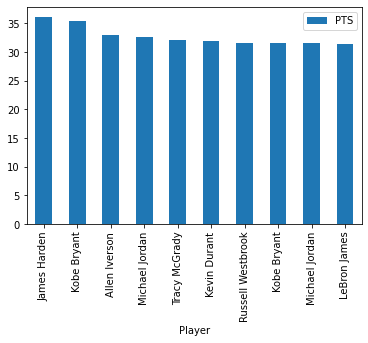

In [56]:
highest_scoring.plot.bar("Player", "PTS")

In [59]:
highest_scoring = stats.groupby("Year").apply(lambda x: x.sort_values("PTS", ascending=False).head(1))

<AxesSubplot:xlabel='Year'>

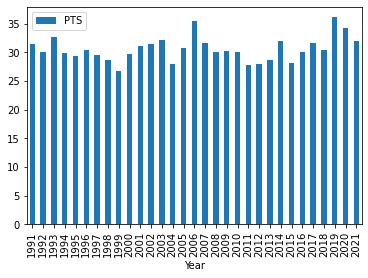

In [60]:
highest_scoring.plot.bar("Year", "PTS")

In [61]:
stats.corr()["Share"]

Unnamed: 0_x   -0.016138
Rk             -0.015812
Age             0.018596
G               0.089282
GS              0.167476
MP              0.162175
FG              0.276365
FGA             0.249254
FG%             0.065789
3P              0.096225
3PA             0.096460
3P%             0.013611
2P              0.275976
2PA             0.251885
2P%             0.063240
eFG%            0.059335
FT              0.316392
FTA             0.321457
FT%             0.037875
ORB             0.101375
DRB             0.213241
TRB             0.186209
AST             0.200253
STL             0.175041
BLK             0.154713
TOV             0.233015
PF              0.071045
PTS             0.288267
Year           -0.008135
Pts Won         0.995153
Pts Max         0.521335
Share           1.000000
W               0.122718
L              -0.121866
W/L%            0.126559
GB             -0.101014
PS/G            0.045206
PA/G           -0.039617
SRS             0.122782
Name: Share, dtype: float

<AxesSubplot:>

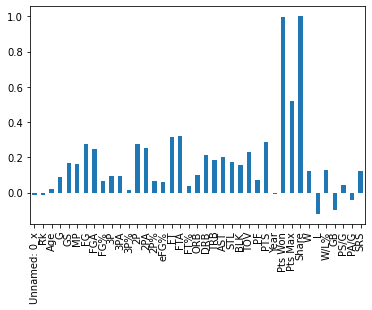

In [62]:
stats.corr()["Share"].plot.bar()